In [1]:
from src import physics

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
libphysics = physics.load_library('libs/libphysics.so')
planets = libphysics.new_planets([(10., 20.), (-20., -30)])
missiles = libphysics.new_missiles(3)

In [4]:
def shoot(missile, *, n=6):
    x = np.empty((0, 3))
    v = np.empty((0, 3))
    
    premature = False
    while n > 0 and not premature:
        n -= 1
        premature = missile.propagate(planets, 1e-3)
        if premature:
            print('!!! PREMATURE !!!')
        
        x = np.concatenate((x, missile.trajectory['x']), axis=0)
        v = np.concatenate((v, missile.trajectory['v']), axis=0)
    
    return x, v

In [5]:
m = missiles[0]
m.launch(planets=planets, planet_id=0, v=200., psi=90.)

x, v = shoot(m)
x.shape, v.shape

((600, 3), (600, 3))

In [6]:
m = missiles[0]
m.set(pos=x[-1], vel=-v[-1])

x2, v2 = shoot(m)
x2.shape, v2.shape

!!! PREMATURE !!!


((543, 3), (543, 3))

In [7]:
def plot(x):
    lat = np.rad2deg(np.arcsin(x[:, 2]))
    lon = np.rad2deg(np.arctan2(x[:, 0], x[:, 1]))

    fig, ax = plt.subplots()
    ax.plot(lon, lat)

    ax.grid()
    ax.set_xlabel('Longitude (deg.)')
    ax.set_ylabel('Latitude (deg.)')

    for plat, plon in planets.planet_pos:
        ax.plot(plon, plat, 'o', c='black')

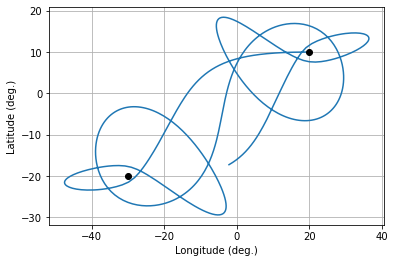

In [8]:
plot(x)

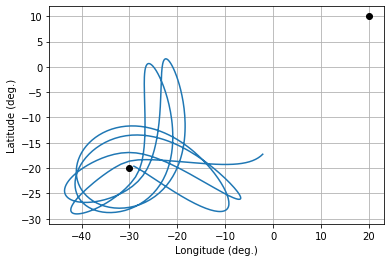

In [9]:
plot(x2)